In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('charity_navigator_clean.csv', index_col = 0)

In [3]:
n = 0
for excess_or_deficit in df['excess_or_deficit_for_year']:
    if df.loc[n, 'excess_or_deficit_for_year'] > 0:
        df.loc[n, 'excess_or_deficit_id'] = str(1)
        n += 1
    elif df.loc[n, 'excess_or_deficit_for_year'] <= 0:
        df.loc[n, 'excess_or_deficit_id'] = str(0)
        n += 1

In [4]:
df2 = df[df['compensation_leader_compensation'].isnull() == False]
org_type_dummies = pd.get_dummies(df2.org_type)
df2 = pd.concat([df2, org_type_dummies], axis=1, join = 'outer')
df2.drop(['charity_name', 'charity_url', 
          'city', 'cn_advisory', 
          'state', 'org_type',
          'org_category', 'compensation_leader_title'], 
         axis = 1, inplace = True)
df2.head()

,accountability_score,administrative_expenses,compensation_leader_compensation,compensation_leader_expense_percent,excess_or_deficit_for_year,financial_score,fundraising_expenses,net_assets,other_revenue,overall_score,...,"Arts, Culture, Humanities",Community Development,Education,Environment,Health,Human Services,Human and Civil Rights,International,Religion,Research and Public Policy
0,89.0,164590.0,53463.0,3.11,349718.0,90.56,111522,1350382,49634.0,89.75,...,0,0,0,0,0,0,1,0,0,0
1,86.0,1001560.0,73500.0,1.47,1175965.0,85.92,54613,14773920,382540.0,85.95,...,0,0,1,0,0,0,0,0,0,0
2,85.0,93957.0,85000.0,0.99,-461502.0,77.65,248833,-770370,0.0,80.96,...,0,0,0,0,0,0,0,1,0,0
3,86.0,346867.0,61220.0,0.78,1872733.0,97.50,384550,11460087,-81726.0,89.94,...,0,0,1,0,0,0,0,0,0,0
4,97.0,135195.0,74244.0,5.41,-103940.0,87.08,87436,723772,32436.0,90.62,...,0,0,0,0,0,0,0,0,1,0


In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from adspy_shared_utilities import plot_decision_tree
from sklearn import metrics

In [6]:
X = df2[['accountability_score', 'financial_score',
         'overall_score', 'administrative_expenses',
         'fundraising_expenses', 'net_assets',
         'other_revenue', 'payments_to_affiliates',
         'compensation_leader_compensation', 
         'compensation_leader_expense_percent',
         'Animals', 'Arts, Culture, Humanities',
         'Community Development', 'Education',
         'Environment', 'Health', 'Human Services',
         'Human and Civil Rights', 'International',
         'Religion']]
y = df2['excess_or_deficit_id']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 101)

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
df_scaled_features = pd.DataFrame(X_train_scaled, columns = X.columns)
df_scaled_features2 = pd.DataFrame(X_test_scaled, columns = X.columns)
df_scaled_features = pd.concat([df_scaled_features, df_scaled_features2], axis=1, join = 'outer')
df_scaled_features.head()

,accountability_score,financial_score,overall_score,administrative_expenses,fundraising_expenses,net_assets,other_revenue,payments_to_affiliates,compensation_leader_compensation,compensation_leader_expense_percent,...,Animals,"Arts, Culture, Humanities",Community Development,Education,Environment,Health,Human Services,Human and Civil Rights,International,Religion
0,0.523977,0.794084,0.977527,1.416871,0.885268,0.290553,-0.089992,-0.075257,0.007558,-1.394520,...,-0.243064,-0.413244,-0.325487,-0.283784,-0.235588,-0.336121,1.560762,-0.207767,-0.268927,-0.237206
1,0.971347,0.136413,0.490523,-0.150319,0.024736,-0.116007,-0.299356,-0.075257,0.614274,0.028344,...,-0.243064,2.419876,-0.325487,-0.283784,-0.235588,-0.336121,-0.640713,-0.207767,-0.268927,-0.237206
2,0.971347,-0.355110,0.046528,-0.101158,-0.106470,-0.118849,-0.136323,-0.075257,-0.021811,0.197229,...,-0.243064,2.419876,-0.325487,-0.283784,-0.235588,-0.336121,-0.640713,-0.207767,-0.268927,-0.237206
3,-3.166823,-2.782065,-3.394119,-0.120767,-0.074416,-0.147770,-0.153193,-0.075257,-0.230468,1.856533,...,-0.243064,-0.413244,-0.325487,-0.283784,-0.235588,2.975122,-0.640713,-0.207767,-0.268927,-0.237206
4,0.188450,0.008835,0.227415,0.377612,0.032822,0.547113,0.209070,-0.075257,2.738364,-0.410760,...,-0.243064,2.419876,-0.325487,-0.283784,-0.235588,-0.336121,-0.640713,-0.207767,-0.268927,-0.237206


In [9]:
dtree = DecisionTreeClassifier(max_depth = 5)
dtree.fit(X_train_scaled, y_train)
y_pred = dtree.predict(X_test_scaled)

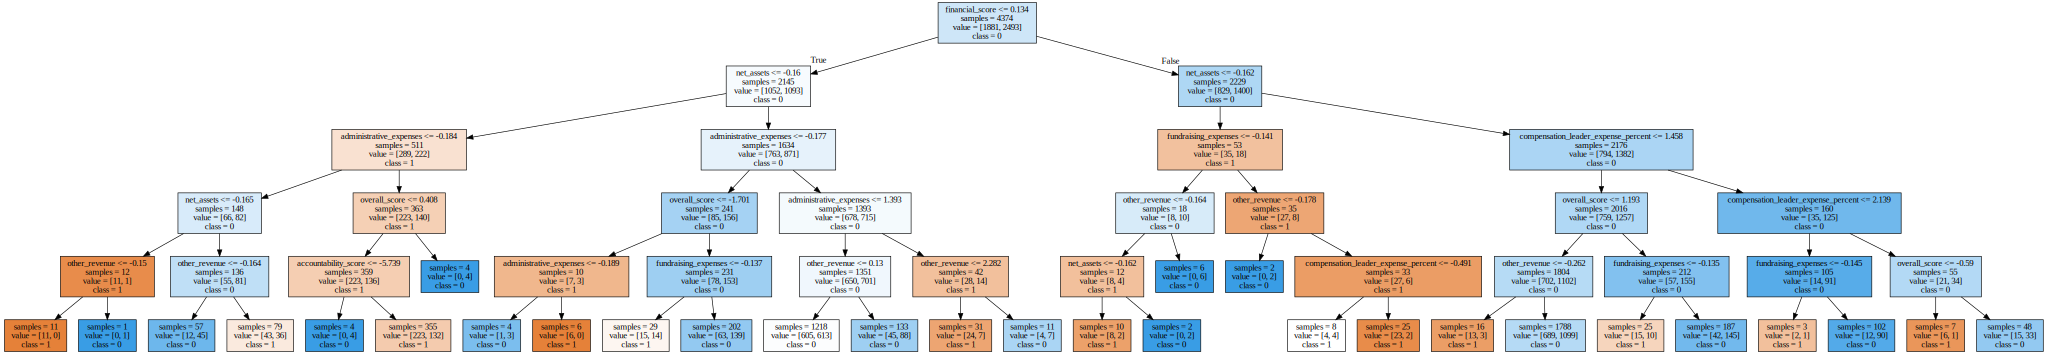

In [10]:
plot_decision_tree(dtree, X.columns, y.unique())

In [11]:
print('Train R^2:', dtree.score(X_train_scaled, y_train).round(4))
print('Test  R^2:', dtree.score(X_test_scaled, y_test).round(4))
print('MAE:      ', metrics.mean_absolute_error(y_test, y_pred).round(4))
print('MSE:      ', metrics.mean_squared_error(y_test, y_pred).round(4))
print('RMSE:     ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)).round(4))

Train R^2: 0.6113
Test  R^2: 0.5744
MAE:       0.4256
MSE:       0.4256
RMSE:      0.6524


In [12]:
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.51      0.14      0.22      1245
          1       0.58      0.90      0.71      1671

avg / total       0.55      0.57      0.50      2916

[[ 174 1071]
 [ 170 1501]]


In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
rfc = RandomForestClassifier(n_estimators = 600)
rfc.fit(X_train_scaled, y_train)
y_pred = rfc.predict(X_test_scaled)

In [15]:
print('Train R^2:', rfc.score(X_train_scaled, y_train).round(4))
print('Test  R^2:', rfc.score(X_test_scaled, y_test).round(4))
print('MAE:      ', metrics.mean_absolute_error(y_test, y_pred).round(4))
print('MSE:      ', metrics.mean_squared_error(y_test, y_pred).round(4))
print('RMSE:     ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)).round(4))

Train R^2: 1.0
Test  R^2: 0.5792
MAE:       0.4208
MSE:       0.4208
RMSE:      0.6487


In [16]:
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.51      0.34      0.41      1245
          1       0.61      0.76      0.67      1671

avg / total       0.57      0.58      0.56      2916

[[ 420  825]
 [ 402 1269]]
